# Lab 8: Define and Solve an ML Problem of Your Choosing

In [208]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [209]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename, header=0)

df.head()
# print(df.columns.tolist())

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. World Happiness Report from 2018
2. My label will be "Confidence in national government"
3. This will be a supervised learning problem, as we have labeled data we can train and test our model with. This could be a regression problem if we wanted to predict a numerical output in the same format that confidence is currently presented in our dataset (0.0-1.0), or we could make it a classification problem if we wanted to put our predictions into categories like "low confidence," "medium", "high," etc. I chose to make it a regression problem because there might not be distinct and separate categories.
4. I feel like features with greater predictive power may include "Perceptions of corruption", "Log GDP per capita," and "Freedom to make life choices."
5. Being able to predict confidence in national government would be useful for governments or political think tanks, because they could track which factors most influence citizens' confidence in the government and help them make more popular policy decisions and win over voters when campaigning. I also personally was inspired to work on this project because from talking to people around me/sentiment online, I feele like confidence in the U.S. government is at an all-time low (amongst both parties), and I'm curious to see if history can explain to me what is causing this sentiment

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

I will start by familiarizing myself with the label and datasets:
1. Inspect the data with describe() and dtypes()
3. Remove columns that shouldn't be features/have no predictive value
5. Identify and handle outliers (with winsorization?)
6. Handle missing data -- remove rows where the label is missing, replace missing values with mean values of non-label columns
7. We do not need to do any one-hot encoding because we have removed all text data (country)
8. Find the most correlated features through a correlation matrix and other visualizations
9. Feature selection -- use correlation analysis/visualizations

In [210]:
# 1. Inspect data
print(df.describe())
print(df.dtypes)

              year  Life Ladder  Log GDP per capita  Social support  \
count  1562.000000  1562.000000         1535.000000     1549.000000   
mean   2011.820743     5.433676            9.220822        0.810669   
std       3.419787     1.121017            1.184035        0.119370   
min    2005.000000     2.661718            6.377396        0.290184   
25%    2009.000000     4.606351            8.310665        0.748304   
50%    2012.000000     5.332600            9.398610        0.833047   
75%    2015.000000     6.271025           10.190634        0.904329   
max    2017.000000     8.018934           11.770276        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1553.000000                   1533.000000   
mean                          62.249887                      0.728975   
std                            7.960671                      0.145408   
min                           37.766476                      0.25753

In [211]:
# 2. Remove irrelevant columns

# Drop country and year beacuse they serve as an ID and not a predictive/numeric feature
# Drop other derived columns like the standard deviation columns because these are redundant information from other columns

drop_cols = [
    'country',
    'year',
    'Standard deviation of ladder by country-year',
    'Standard deviation/Mean of ladder by country-year',
    'GINI index (World Bank estimate), average 2000-15',
    'gini of household income reported in Gallup, by wp5-year'
]

df = df.drop(columns=drop_cols)

In [212]:
(list(df.columns))

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'GINI index (World Bank estimate)']

In [213]:
# 3. Handle outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_summary = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per column:")
print(outlier_summary)


Number of outliers per column:
Life Ladder                            0
Log GDP per capita                     0
Social support                        36
Healthy life expectancy at birth       9
Freedom to make life choices           8
Generosity                            22
Perceptions of corruption            130
Positive affect                        0
Negative affect                       27
Confidence in national government      0
Democratic Quality                     0
Delivery Quality                       0
GINI index (World Bank estimate)       3
dtype: int64


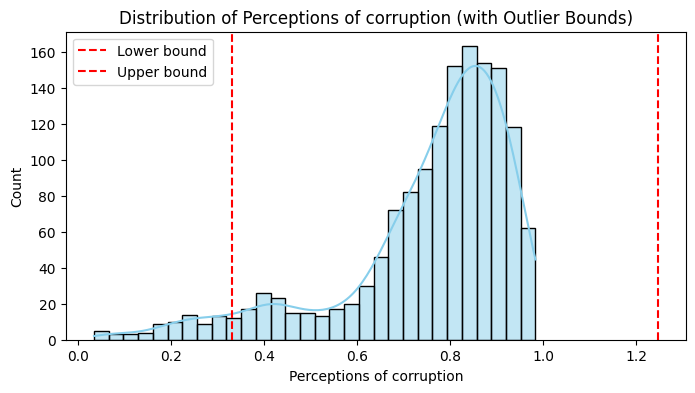

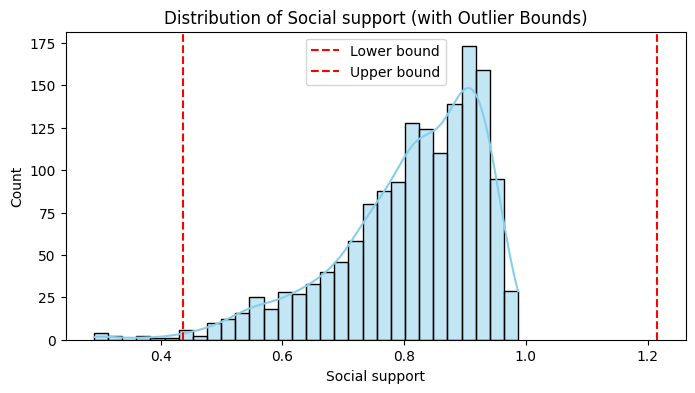

In [214]:
# It seems "Perceptions of corruption" and "Social support" have the most outliers
# I will try visualizing to see if it is skewing the data significantly

features_to_check = ['Perceptions of corruption', 'Social support']

for feature in features_to_check:
    # Calculate IQR boundaries
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    
    # Plot histogram with KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper bound')
    plt.title(f"Distribution of {feature} (with Outlier Bounds)")
    plt.legend()
    plt.show()

In [215]:
# It seems both features have outliers on the lower bound only
# I will winsorize the bottom 1% of values for each
# Only 1% because we don't want to consider too much data as outliers
# Let's create new columns for the winsorized versions so we have a record of which ones we altered

import scipy.stats as stats

cols_to_winsorize = ['Perceptions of corruption', 'Social support']
for col in cols_to_winsorize:
    winsorized_col = col + '_winsorized'
    df[winsorized_col] = stats.mstats.winsorize(df[col], limits=[0.01, 0])


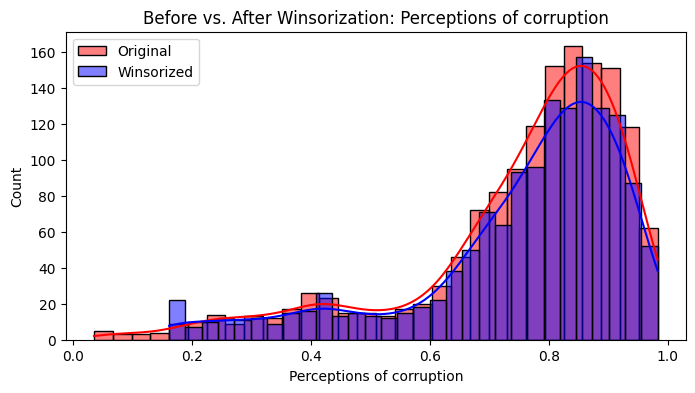

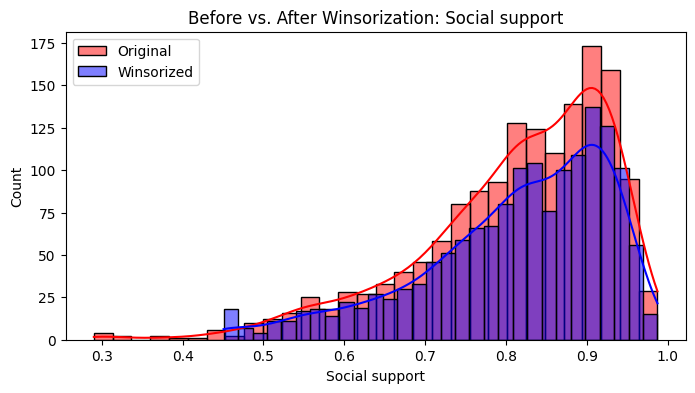

['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate)', 'Perceptions of corruption_winsorized', 'Social support_winsorized']


In [216]:
# visualize to confirm we winsorized, drop original columns after
for col in cols_to_winsorize:
    winsorized_col = col + '_winsorized'
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='red', label='Original', alpha=0.5)
    sns.histplot(df[winsorized_col], bins=30, kde=True, color='blue', label='Winsorized', alpha=0.5)
    plt.title(f"Before vs. After Winsorization: {col}")
    plt.legend()
    plt.show()

df = df.drop(columns=cols_to_winsorize)
print(df.columns.tolist())

In [217]:
# 4. Handle missing data

# find columns with missing values
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Life Ladder                               0
Log GDP per capita                       27
Healthy life expectancy at birth          9
Freedom to make life choices             29
Generosity                               80
Positive affect                          18
Negative affect                          12
Confidence in national government       161
Democratic Quality                      171
Delivery Quality                        171
GINI index (World Bank estimate)        979
Perceptions of corruption_winsorized     90
Social support_winsorized                13
dtype: int64


In [218]:
# drop rows where label is mising
label_col = 'Confidence in national government'
df = df.dropna(subset=[label_col])

# confirm dropping was successful
print(df['Confidence in national government'].isnull().sum())

0


In [219]:
# use mean for other missing values
non_label_cols = df.columns.drop(label_col)
df[non_label_cols] = df[non_label_cols].fillna(df[non_label_cols].mean())

# confirm all missing values were replaced
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Life Ladder                             0
Log GDP per capita                      0
Healthy life expectancy at birth        0
Freedom to make life choices            0
Generosity                              0
Positive affect                         0
Negative affect                         0
Confidence in national government       0
Democratic Quality                      0
Delivery Quality                        0
GINI index (World Bank estimate)        0
Perceptions of corruption_winsorized    0
Social support_winsorized               0
dtype: int64


In [220]:
# 6. Correlation matrix

corr_matrix = round(df.corr()[label_col],5)
corr_matrix_sorted = corr_matrix.reindex(corr_matrix.abs().sort_values(ascending=False).index)
corr_matrix_sorted

Confidence in national government       1.00000
Perceptions of corruption_winsorized   -0.43094
Freedom to make life choices            0.40651
Generosity                              0.27090
Healthy life expectancy at birth       -0.18857
Log GDP per capita                     -0.16103
Social support_winsorized              -0.16100
Negative affect                        -0.15921
Positive affect                         0.14401
Democratic Quality                     -0.13748
Life Ladder                            -0.08554
Delivery Quality                       -0.04370
GINI index (World Bank estimate)        0.00943
Name: Confidence in national government, dtype: float64

In [221]:
# Extract columns with the most pos or neg correlation (excluding the label itself)

top_five_corr = list(corr_matrix_sorted.index[1:6])
top_five_corr

['Perceptions of corruption_winsorized',
 'Freedom to make life choices',
 'Generosity',
 'Healthy life expectancy at birth',
 'Log GDP per capita']

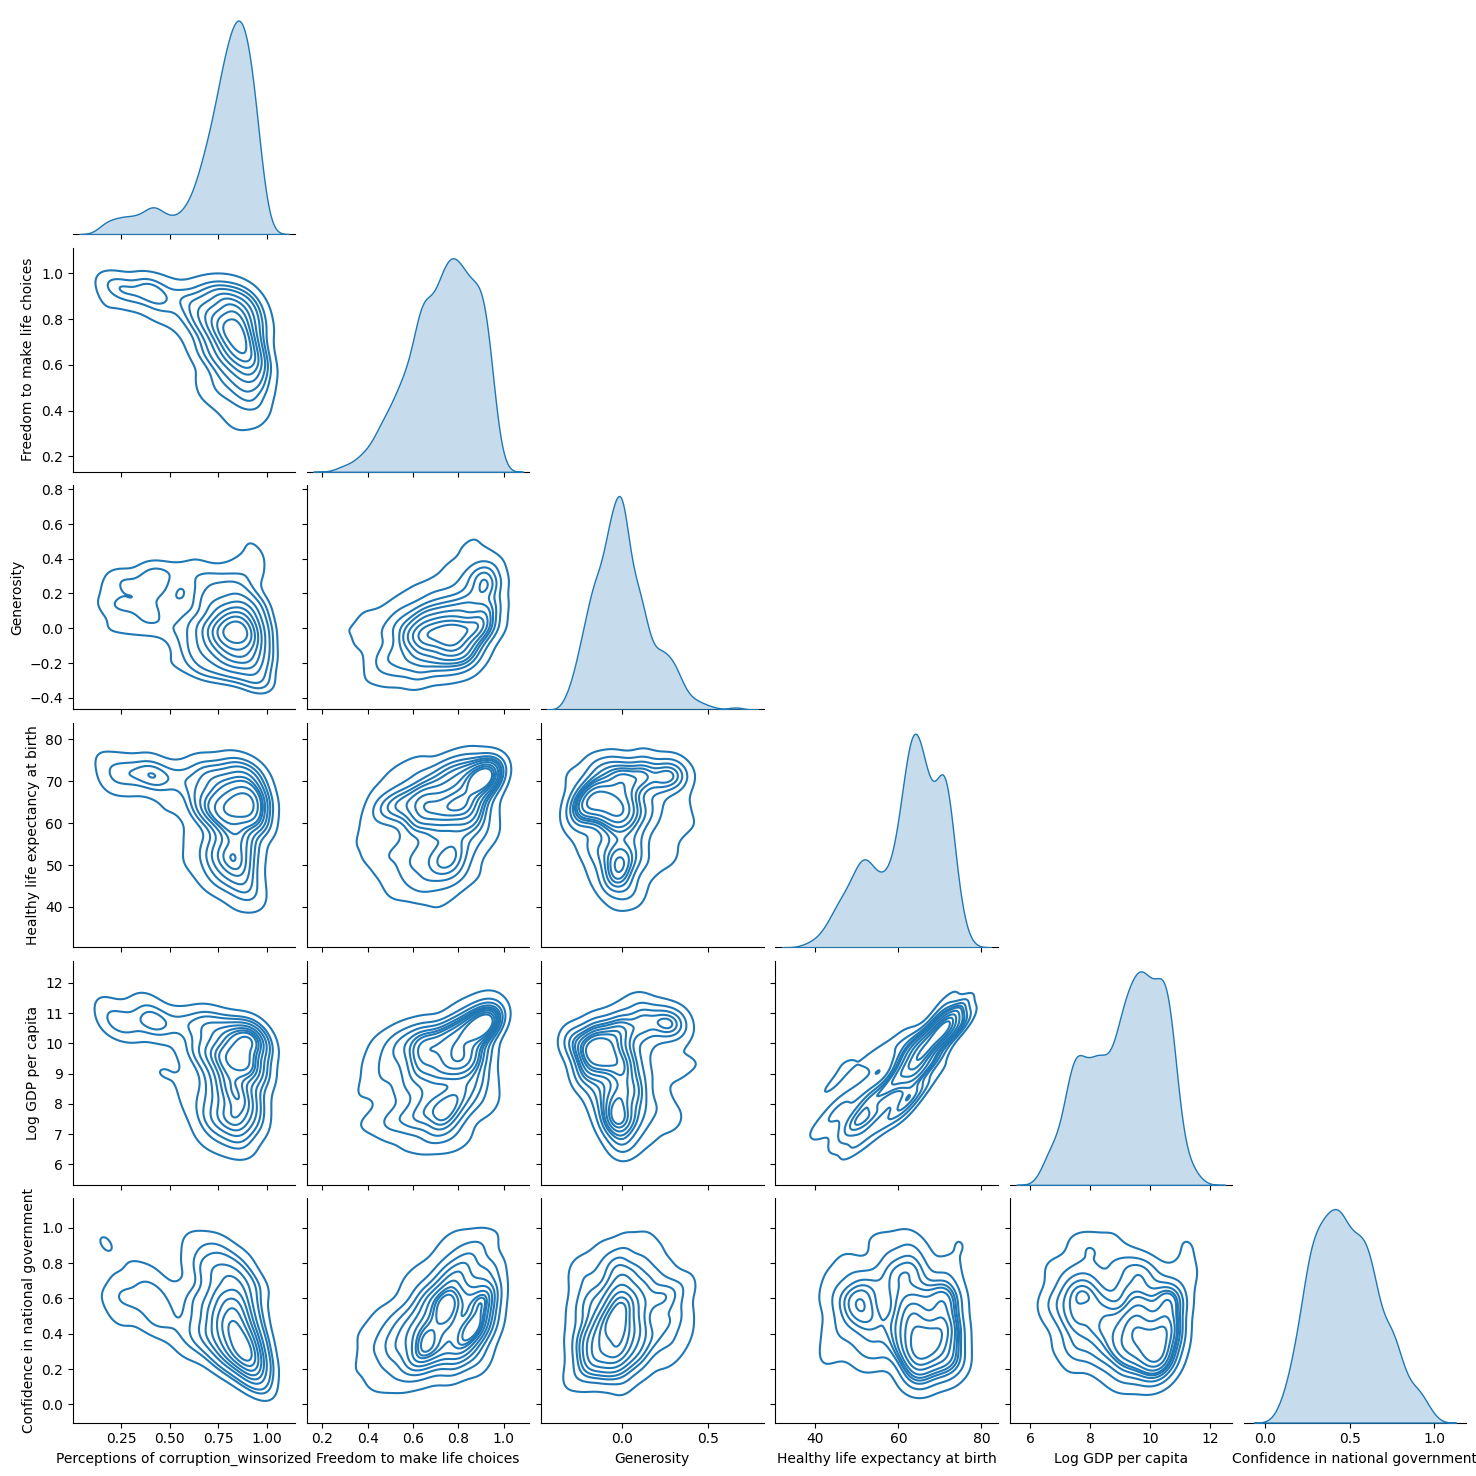

In [222]:
# Visualize relationship between features + label

df_corrs = df[top_five_corr].copy()
df_corrs[label_col] = df[label_col]

sns.pairplot(data=df_corrs, kind = 'kde', corner=True)

The diagonal of the pairplot shows the distribution for each variable--most of these (especialy freedom to make life choices and generosity which are unimodal) tend to fall in the same range, indicating most people feel the same way/there aren't a lot of outliers that will affect the model.

The bottom row shows the relationship between each feature and the label, and these contour plots show if there's a positive/negative relationship between them. With the most correlated variable, perceptions of corruption, you can see that there are very tight elliptical shapes along a downward diagonal, indicating a stronger linear relationship. The other variables also have linear relationships, although some like freedom to make life choices have a few different clusters of responses which might make them less correlated.

I'm personally a little surprised that "Life Ladder" aka happiness had a very weak correlation with "confidence in government" because I feel like political news like new legislation or executive orders tends to spark lots of outrage/debate/happiness among Gen-Z media online, but I guess it doesn't affect most people's day to day emotions. 

In any case, we have now established a better understanding of the most predictive features. I will keep other less predictive features besides the top 5 for now to see if keeping them will increase accuracy enough to offset the computational cost, but I will remove the 3 features with the lowest correlation because there is a noteable gap in correlation value between them and the other features.

In [223]:
# 7. Feature selection - drop columns with low predictive value
cols_to_drop = corr_matrix_sorted.index[-3:].tolist()
df = df.drop(columns=cols_to_drop)
print(df.columns.tolist())

['Log GDP per capita', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Perceptions of corruption_winsorized', 'Social support_winsorized']


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I do have a new feature list! For now, I included most features because I'd rather keep them now and drop more later during model testing, but I dropped all features with a lower correlation value than "Democratic Quality" -0.13748, because the next one after that was "Life Ladder" -0.08554 and there is a noteable difference between those values. I felt including the bottom 3 features would just lead to overfitting and an overly complex and computationally expensive model.
2. I've finished data cleaning, but we also need to do some data prep like splitting data into training/testing sets.
3. I picked 3 models: linear regression to build a simple and fast model and get a clear baseline of whether a simple linear relationship can explain the data; random forest for non-linear modeling that is less prone to overfitting compared to single decision trees; gradient boosted decision trees to push model performance even more than random forests.
4. Modeling plan:
- Splitting data 80/20 for training and validation
- Feature scaling for the linear regression model
- Training with default hyperparameters to establish baseline performance
- Using K-fold cross validation to evaluate generalization ability
- Evaluating model performance (probably with RMSE or R^2 score? Can't use accuracy since this is a regression and not classification problem)
- Tuning hyperparameters for each model
- Choosing model with lowest cross-validated RMSE

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [224]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [225]:
# Split data

X = df.drop(columns=['Confidence in national government'])
y = df['Confidence in national government']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1401, 9) (1401,)


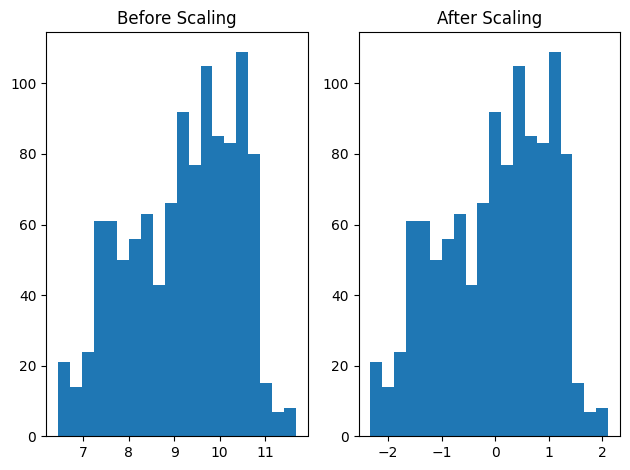

In [226]:
# Feature scaling for linear regression model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example: Check distribution of a feature before/after scaling
feature_idx = 0  # Choose any column index

plt.subplot(1, 2, 1)
plt.hist(X_train.iloc[:, feature_idx], bins=20)
plt.title("Before Scaling")

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, feature_idx], bins=20)
plt.title("After Scaling")

plt.tight_layout()
plt.show()

In [227]:
# Define our 3 models

lr = LinearRegression()
rf = RandomForestRegressor(random_state=1234)
gbdt = GradientBoostingRegressor(random_state=1234)

In [228]:
# evaluate with k-fold cross validation

num_folds = 5
cv = KFold(n_splits = num_folds, shuffle=True, random_state=10)


# Linear Regression (with scaled features)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=cv)
print(f"Linear Regression CV RMSE: {abs(lr_scores.mean()):.5f} ± {lr_scores.std():.5f}")

# Random Forest
rf_scores = cross_val_score(rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
print(f"Random Forest CV RMSE: {abs(rf_scores.mean()):.5f} ± {rf_scores.std():.5f}")

# GBDT (Gradient Boosting Regressor)
gbdt_scores = cross_val_score(gbdt, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
print(f"GBDT CV RMSE: {abs(gbdt_scores.mean()):.5f} ± {gbdt_scores.std():.5f}")

Linear Regression CV RMSE: 0.13996 ± 0.00555
Random Forest CV RMSE: 0.10583 ± 0.00910
GBDT CV RMSE: 0.11155 ± 0.00551


Lower RMSE = smaller prediction error, so currently random forest is performing the best. I was expecting the GBDT model to do best, but it has slightly higher RMSE. It does however have a lower standard deviation, meaning that it's more consistent across folds. The GBDT having a lower performance could be due to overfitting, which we can tweak during the hyperparameter adjustment stage. 

The linear model is a good baseline, but since it has the highest RMSE we can probably assume that the relationship between the features and label are not fully linear.

In [229]:
# Hyperparameter turning through gridsearch

# A standard linear regression model has no hyperparameters to tune
# We'll just fit it to the training data and continue
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# We'll move onto tuning the random forest

model = RandomForestRegressor(random_state=1234)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search = grid.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print(f'Best Random Forest Params: {grid_search.best_params_}')
print(f'Random Forest CV RMSE: {-grid_search.best_score_:.5f}')

In [ ]:
model = GradientBoostingRegressor(random_state=1234)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search = grid.fit(X_train, y_train)

best_gbdt = grid_search.best_estimator_

print(f'Best GBDT Params: {grid_search.best_params_}')
print(f'GBDT CV RMSE: {-grid_search.best_score_:.5f}')

The cross-validation score indicates the GBDT generalizes best on average across folds. However, I still want to validate all 3 models against the test data to check generalization ability on unseen data. 


In [ ]:
model_dict = {
    'LinearRegression': (lr, X_test_scaled),
    'RandomForest': (best_rf, X_test),
    'GBDT': (best_gbdt, X_test)
}

plt.figure(figsize=(14, 12))

# for name, (model, X_eval) in model_dict.items():
#     y_pred = model.predict(X_eval)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     r2 = r2_score(y_test, y_pred)
#     print(f"{name}: RMSE = {rmse:.5f}, R² = {r2:.5f}")

for i, (name, (model, X_eval)) in enumerate(model_dict.items(), 1):
    y_pred = model.predict(X_eval)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.5f}, R² = {r2:.5f}")

    # Plot Actual vs Predicted
    plt.subplot(len(model_dict), 2, 2*i - 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted')

plt.tight_layout()
plt.show()


Conclusions: 
- As expected, the GBDT had the best performance against both the training and validation set (lower RMSE, higher R² = indicators of better performance)
- The linear regression model was definitely too simple for this dataset--R² being negative (-22.01823) indicates that this model fit even worse than just predicting the mean of the target every time, which you can also see in the scatterplot where it largely diverges from the data on the right
- The random forest model does a much better job at capturing non-linearities (RMSE = 0.10192) and R² = 0.70336, meaning it can explain about ~70% of the variance in the test set
- The GBDT model slightly outperforms the random forest (RMSE = 0.09904, R² = 0.71987) which aligns with what I expected since GBDTs generally have higher accuracy when dealing with more complex datasets/datasets with more outliers